# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [2]:
####
alpha=.05 #Significance level
iterations=100 #MC simulations to calculate type-1 error and power
p=20 #Z dim
m=400 #Training set size
n=100 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 30 #Number of different generative configurations (different pairs (a,b))

####
bas = [[np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)] for j in range(nbas)]
skews = [1,3]
losses = ['mse','mae']

In [3]:
(((iterations*nbas*len(skews)*len(losses)))/(100*30))*(160/60)

10.666666666666666

# Experiments

In [4]:
results = {'set':[], 
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[]}

In [5]:
count=0

for ba in tqdm(bas):
    # Parameters a and b
    b = ba[0]
    a = ba[1]
            
    for skew in skews:
        for loss in losses:
              
            #### Type I error ####
            c = 0
            
            #STFR,RESIT,GCM,RBPT,RBPT2#
            tests={'stfr':True, 'resit':True, 'gcm':True, 'crt':True, 'cpt':True,'rbpt':True, 'rbpt2':True}
            theta=0
            gammas = np.linspace(0,.04,npar)
            for gamma in gammas:
                # Running
                pool = mp.Pool(cpu)
                out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('type1_1')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
            
            #CRT,CPT,RBPT#
            tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':True, 'cpt':True,'rbpt':True, 'rbpt2':False}
            thetas = np.linspace(0,6,npar)
            gamma = 0
            for theta in thetas:
                # Running
                pool = mp.Pool(cpu)
                out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('type1_2')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
        
        
            #### Power ####
            tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':True,'rbpt':True, 'rbpt2':True}
            cs = np.linspace(0,.5,npar)
            theta = 0
            gamma = 0
            for c in cs:
                # Running
                pool = mp.Pool(cpu)
                out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('power')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
            
    # Update 'count'
    count+=1

100%|██████████| 30/30 [7:09:24<00:00, 858.81s/it]  


## Saving results

In [6]:
results = pd.DataFrame(results)
results.to_csv('results/artificial_data_experiments_skew{:}.csv'.format(skew))

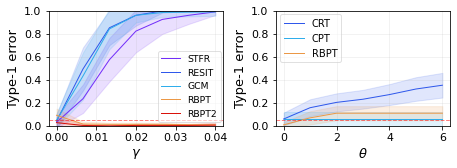

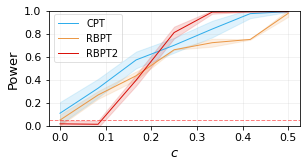

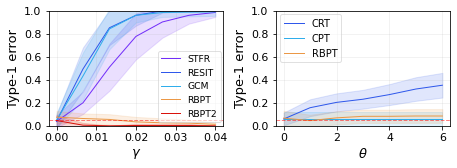

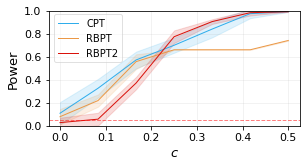

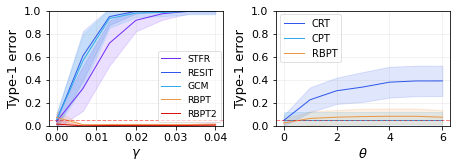

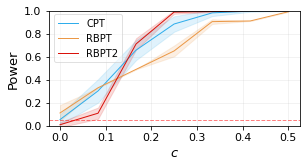

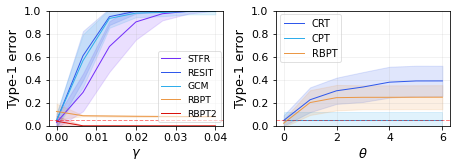

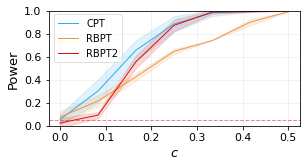

In [7]:
for skew in skews:
    for loss in losses:
        ###
        plt.figure(figsize=(.9*8,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 2, 1)
        plot_type1(results, sett='type1_1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='Type-1 error', legend=True)
        plt.subplot(1, 2, 2)
        plot_type1(results, sett='type1_2', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-1 error', legend=True)
        plt.savefig('plots/exp1_type1_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

        ###
        plt.figure(figsize=(.9*5,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 1, 1)
        plot_power(results, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel='Power', legend=True)
        plt.savefig('plots/exp1_power_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

In [8]:
results

,set,ba,c,theta,skew,gamma,loss,stfr,resit,gcm,crt,cpt,rbpt,rbpt2
0,type1_1,0,0.000000,0.0,1,0.000000,mse,0.00,0.00,0.00,0.01,0.08,0.01,0.00
1,type1_1,0,0.000000,0.0,1,0.006667,mse,0.09,0.41,0.50,0.01,0.09,0.01,0.00
2,type1_1,0,0.000000,0.0,1,0.013333,mse,0.50,0.83,0.75,0.01,0.09,0.01,0.00
3,type1_1,0,0.000000,0.0,1,0.020000,mse,0.83,1.00,0.99,0.01,0.09,0.01,0.00
4,type1_1,0,0.000000,0.0,1,0.026667,mse,0.99,1.00,0.99,0.01,0.09,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,power,29,0.166667,0.0,3,0.000000,mae,NaN,NaN,NaN,NaN,0.58,0.41,0.58
2516,power,29,0.250000,0.0,3,0.000000,mae,NaN,NaN,NaN,NaN,0.82,0.57,0.91
2517,power,29,0.333333,0.0,3,0.000000,mae,NaN,NaN,NaN,NaN,0.91,0.74,0.99
2518,power,29,0.416667,0.0,3,0.000000,mae,NaN,NaN,NaN,NaN,0.99,0.91,0.99
